###**Dataset is from Kaggle, and it includes :**

**start_time**: Time when recording started (not needed for prediction).

**FFT_0 to FFT_9:** Frequency features from Fast Fourier Transform to detect vibrations in freq. .

**Impulse_Factor:** Indicates sudden vibration possibly due to impacts or cracks.

**Clearance_Factor:** Shows looseness in the bearing, useful for detecting wear.

**Mean_Absolute_Change:** how much the vibration signal changes from one point to the next, higher values may indicate faults.

**Root_Mean_Square_of_First_Difference:** Vibration energy or strength of the differences between consecutive points in the signal.

**Shannon_Entropy:** Measures randomness in the signal, higher in faulty bearings.

**Energy:** Represents the total power in the vibration signal, higher energy may signal a defect.

**Form_Factor:** Describes signal shape to detect waveform abnormalities, large deviation means faulty.

**Zero_Crossing_Rate:** Counts how often the signal changes sign (from positive to negative or vice versa).

**Turning_Point_Ratio:** Measures how often the signal has peaks and valleys (local highs and lows).

**key:** Target label indicating the type of bearing condition
example :

1 → Normal (No defect)

2 = Inner Race Fault

3 = Outer Race Fault

4 = Ball Fault

5 = Combination Fault (e.g., Ball + Outer race)

6 = Severe Fault (Multiple major defects)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Bearing Feature Extracted Full(new_one).csv")

In [ ]:
df.head()

,start_time,FFT_0,FFT_1,FFT_2,FFT_3,FFT_4,FFT_5,FFT_6,FFT_7,FFT_8,...,Impulse_Factor,Clearance_Factor,Mean_Absolute_Change,Root_Mean_Square_of_First_Difference,Shannon_Entropy,Energy,Form_Factor,Zero_Crossing_Rate,Turning_Point_Ratio,key
0,0.000000,31.315536,0.026463,0.022552,0.020844,0.008484,0.011385,0.038506,0.025452,0.019910,...,1.016272,1.016272,0.006978,0.008461,3.911994,19.614395,30.025117,0.52,1.0,1
1,0.000382,31.258407,0.064264,0.013386,0.012085,0.026802,0.041938,0.017024,0.029024,0.044788,...,1.045820,1.045820,0.020485,0.025362,3.911795,19.550670,28.178667,0.50,1.0,1
2,0.000765,31.301679,0.050746,0.012241,0.027052,0.003939,0.010544,0.035028,0.027375,0.020011,...,1.022890,1.022890,0.008656,0.010892,3.911975,19.597787,29.719099,0.48,1.0,1
3,0.001147,31.257833,0.009600,0.043856,0.057151,0.012073,0.022455,0.090118,0.028734,0.032152,...,1.028446,1.028446,0.014392,0.016926,3.911913,19.545345,29.121952,0.48,1.0,1
4,0.001529,31.365595,0.023202,0.021665,0.021480,0.018160,0.023118,0.031493,0.007047,0.009308,...,1.015489,1.015489,0.006626,0.008707,3.911993,19.677177,30.124962,0.48,1.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15696 entries, 0 to 15695
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   start_time                            15696 non-null  float64
 1   FFT_0                                 15696 non-null  float64
 2   FFT_1                                 15696 non-null  float64
 3   FFT_2                                 15696 non-null  float64
 4   FFT_3                                 15696 non-null  float64
 5   FFT_4                                 15696 non-null  float64
 6   FFT_5                                 15696 non-null  float64
 7   FFT_6                                 15696 non-null  float64
 8   FFT_7                                 15696 non-null  float64
 9   FFT_8                                 15696 non-null  float64
 10  FFT_9                                 15696 non-null  float64
 11  Crest_Factor   

In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
df.head()

,FFT_0,FFT_1,FFT_2,FFT_3,FFT_4,FFT_5,FFT_6,FFT_7,FFT_8,FFT_9,...,Impulse_Factor,Clearance_Factor,Mean_Absolute_Change,Root_Mean_Square_of_First_Difference,Shannon_Entropy,Energy,Form_Factor,Zero_Crossing_Rate,Turning_Point_Ratio,key
0,31.315536,0.026463,0.022552,0.020844,0.008484,0.011385,0.038506,0.025452,0.019910,0.013576,...,1.016272,1.016272,0.006978,0.008461,3.911994,19.614395,30.025117,0.52,1.0,1
1,31.258407,0.064264,0.013386,0.012085,0.026802,0.041938,0.017024,0.029024,0.044788,0.036681,...,1.045820,1.045820,0.020485,0.025362,3.911795,19.550670,28.178667,0.50,1.0,1
2,31.301679,0.050746,0.012241,0.027052,0.003939,0.010544,0.035028,0.027375,0.020011,0.032754,...,1.022890,1.022890,0.008656,0.010892,3.911975,19.597787,29.719099,0.48,1.0,1
3,31.257833,0.009600,0.043856,0.057151,0.012073,0.022455,0.090118,0.028734,0.032152,0.008920,...,1.028446,1.028446,0.014392,0.016926,3.911913,19.545345,29.121952,0.48,1.0,1
4,31.365595,0.023202,0.021665,0.021480,0.018160,0.023118,0.031493,0.007047,0.009308,0.004343,...,1.015489,1.015489,0.006626,0.008707,3.911993,19.677177,30.124962,0.48,1.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15696 entries, 0 to 15695
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FFT_0                                 15696 non-null  float64
 1   FFT_1                                 15696 non-null  float64
 2   FFT_2                                 15696 non-null  float64
 3   FFT_3                                 15696 non-null  float64
 4   FFT_4                                 15696 non-null  float64
 5   FFT_5                                 15696 non-null  float64
 6   FFT_6                                 15696 non-null  float64
 7   FFT_7                                 15696 non-null  float64
 8   FFT_8                                 15696 non-null  float64
 9   FFT_9                                 15696 non-null  float64
 10  Crest_Factor                          15696 non-null  float64
 11  Shape_Factor   

In [ ]:
df.isnull().sum()

,0
FFT_0,0
FFT_1,0
FFT_2,0
FFT_3,0
FFT_4,0
FFT_5,0
FFT_6,0
FFT_7,0
FFT_8,0
FFT_9,0


In [ ]:
x = df.iloc[: , :-1].values
y= df.iloc[: , -1].values

In [ ]:
from sklearn.model_selection import train_test_split  # train_test_split = function and model_selection = module

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # 30 % test data and 70 % training data

In [ ]:
from sklearn import tree

In [ ]:
clfTree = tree.DecisionTreeClassifier(max_depth=5 , criterion = "gini" , random_state=42)
clfTree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Predictions
y_train_pred = clfTree.predict(x_train)
y_test_pred = clfTree.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

Train Accuracy: 0.6862655866023483


In [ ]:
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Test Accuracy: 0.6625610533021873


In [ ]:
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Test Confusion Matrix:
 [[454 207 102  20   0   0]
 [156 619  25   3   0   0]
 [ 64  36 619  50   0   0]
 [  7   6  69 539 112 106]
 [  0   0   2 138 382 243]
 [  0   0   0  41 202 507]]


In [ ]:
dot_data = tree.export_graphviz(clfTree, out_file=None, feature_names=df.columns[:-1], filled=True)
#dot_data is a string in the DOT language, text format used to describe graphs.

tree.export_graphviz(...)	means generates a DOT-format text for the decision tree.
(describes how the tree is structured using nodes and branches)

out_file=None -> means return the tree structure as a string in dot data

filled = true means coloring all label

feature_names=df.columns[:-1] means select every feature except key

In [ ]:
from IPython.display import Image  #Display image files (like PNG, JPEG)

In [ ]:
import pydotplus # convert dot file to png, jpeg

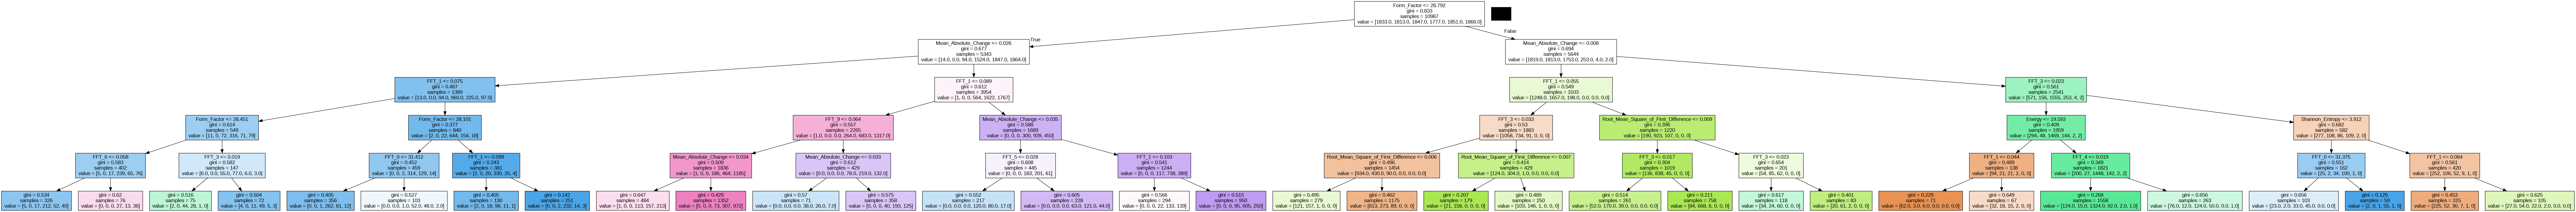

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Steps to create tree :**

1. Create Decision Tree with limits

2. Train model on data

3. Convert to DOT (text-based format for trees)

4. Convert DOT to a graph in png/jpeg

5. Show the tree as a PNG image

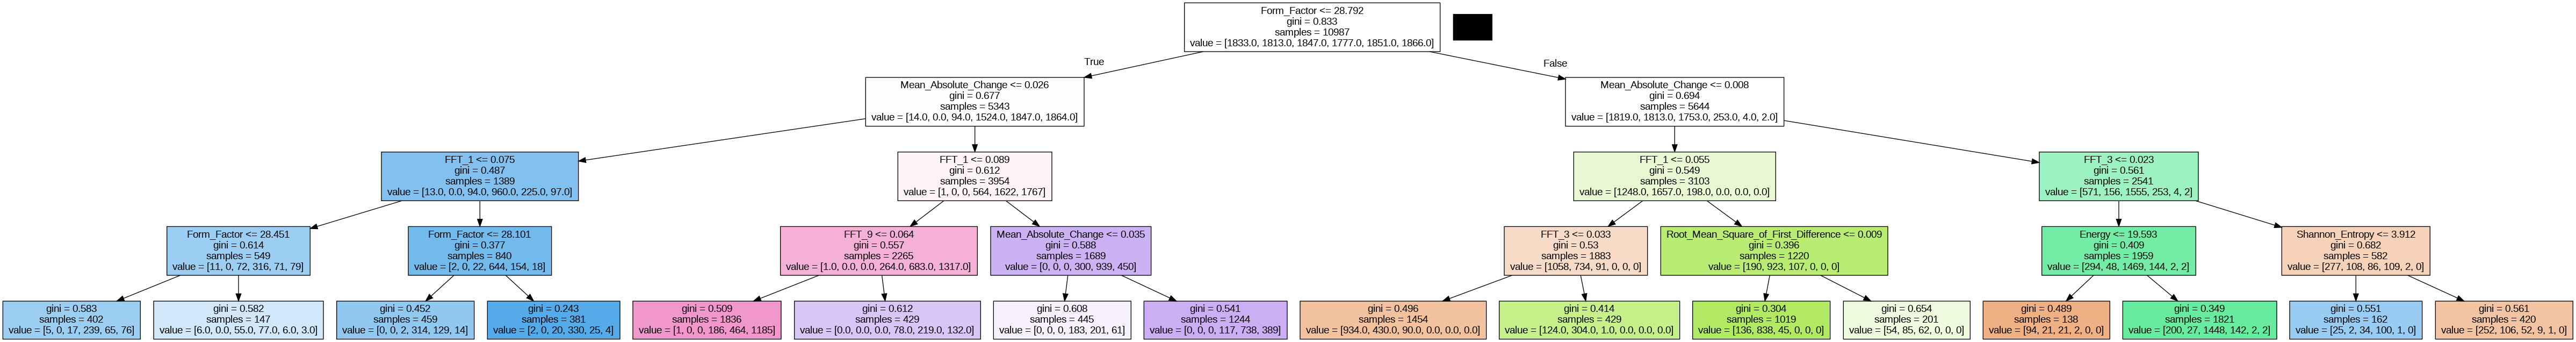

In [ ]:
clfTree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clfTree2.fit(x_train , y_train)
dot_data = tree.export_graphviz(clfTree2, out_file = None , feature_names = df.columns[:-1], filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

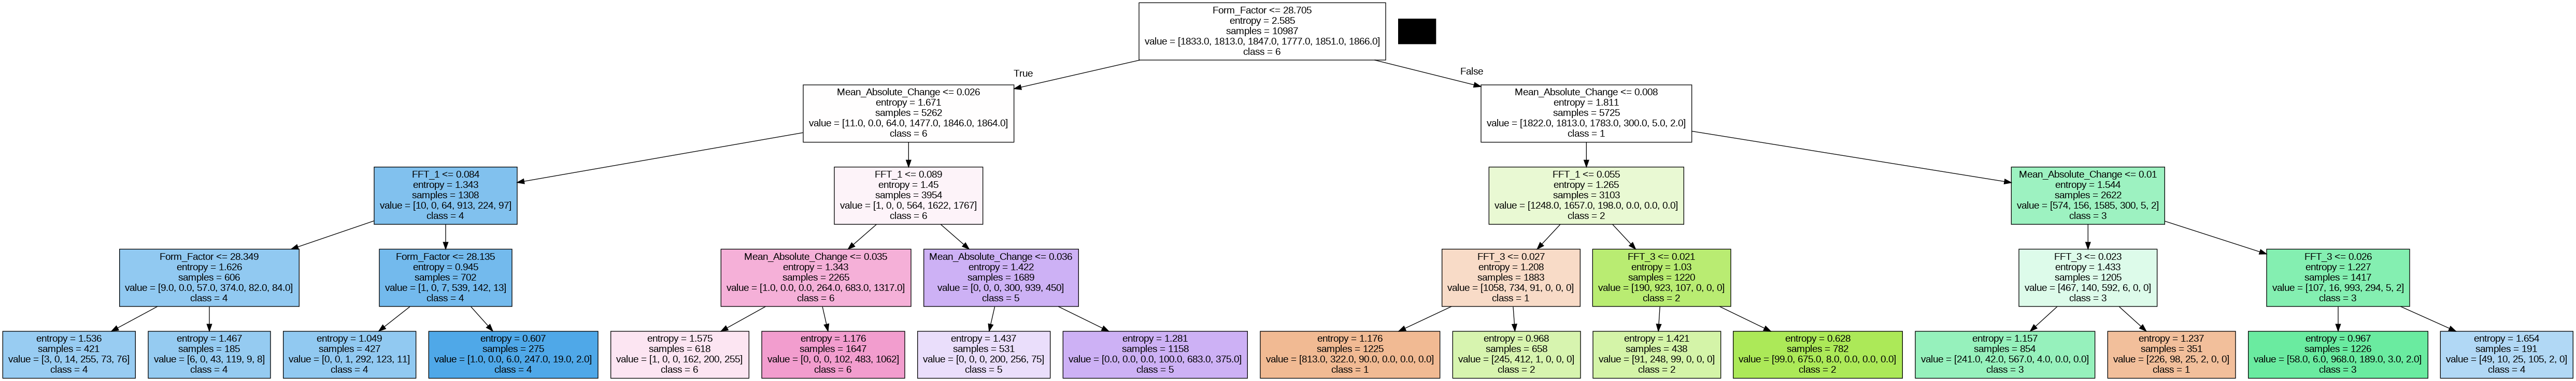

In [ ]:
clfTree3 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20, max_depth=4) # Using 'entropy' for criterion instead of gini(speed)
clfTree3.fit(x_train, y_train)

# Get the unique values of the target variable 'Crest_Factor' to use as class names
class_names = df['key'].unique().astype(str)

# Exclude the target column 'Crest_Factor' from feature_names
feature_names = list(df.columns[:-1])  # All columns except the last one

# Generate the tree visualization using the correct class names and features
dot_data = tree.export_graphviz(clfTree3, out_file=None,
                                feature_names=feature_names,
                                class_names=class_names,
                                filled=True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())